In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler

## A. Import Dataset and Data Processing

In [2]:
url = 'https://raw.githubusercontent.com/adityamhaske/BMR-ML-Pipeline_DBMS/refs/heads/main/Telco-Customer-Churn.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 1. Handling Missing Values:

In [4]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [5]:
for column in df.columns:
    num_unique = df[column].nunique()
    print(f"{column}: {num_unique}")

customerID: 7043
gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
tenure: 73
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
MonthlyCharges: 1585
TotalCharges: 6531
Churn: 2


### 2. Converting Data Types:

In [6]:
# Convert 'TotalCharges' to numeric, setting errors='coerce' to replace blanks with NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# Check missing values after conversion
print(df["TotalCharges"].isnull().sum())  # Should show count of NaNs


11


In [7]:
df["TotalCharges"].fillna(df["MonthlyCharges"] * df["tenure"], inplace=True)

<ipython-input-7-de611db4d995>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["MonthlyCharges"] * df["tenure"], inplace=True)


### 3. Encoding Categorical Features:

In [8]:
# Convert 'Churn' (Target Variable)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Convert other binary categorical columns
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "gender"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0, "Male": 1, "Female": 0})

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [10]:
# One-Hot Encode Multi-Class Categorical Columns
multi_class_cols = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
                    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                    "Contract", "PaymentMethod"]

df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

## B. Feature Engineering

In [11]:
df["TenureGroup"] = pd.cut(df["tenure"], bins=[0, 12, 24, 48, 60, 72, 100],
                           labels=["0-12", "12-24", "24-48", "48-60", "60-72", "72+"])
df = pd.get_dummies(df, columns=["TenureGroup"], drop_first=True)

In [12]:
## Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [13]:
# Convert boolean columns to int (0 or 1)
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

In [14]:
df["Churn"] = df["Churn"].astype(int)

In [15]:
print(df.info())  # Should now have only numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   PaperlessBilling                       7043 non-null   int64  
 8   MonthlyCharges                         7043 non-null   float64
 9   TotalCharges                           7043 non-null   float64
 10  Churn                                  7043 non-null   int64  
 11  Mult

## C. Exploratory Data Analysis

In [16]:
# Summary of numerical columns
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_12-24,TenureGroup_24-48,TenureGroup_48-60,TenureGroup_60-72,TenureGroup_72+
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.0
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,0.265370,...,0.209144,0.240664,0.216101,0.335794,0.228880,0.145393,0.226324,0.118131,0.199773,0.0
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,0.441561,...,0.406726,0.427517,0.411613,0.472301,0.420141,0.352521,0.418481,0.322787,0.399858,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


### 1. Churn Percentage

<ipython-input-17-b6646fee7a52>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Churn"], palette="pastel")


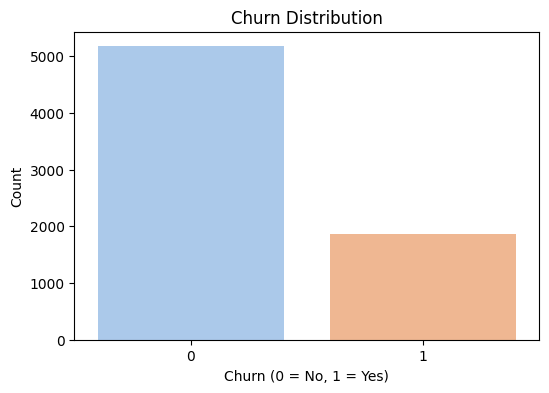

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df["Churn"], palette="pastel")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Display percentage
churn_rate = df["Churn"].value_counts(normalize=True) * 100
print(churn_rate)


### Contract Type vs Churn

<ipython-input-18-2c7762b6fc57>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Contract_One year", y="Churn", data=df, palette="Blues")
<ipython-input-18-2c7762b6fc57>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Contract_Two year", y="Churn", data=df, palette="Reds", alpha=0.7)


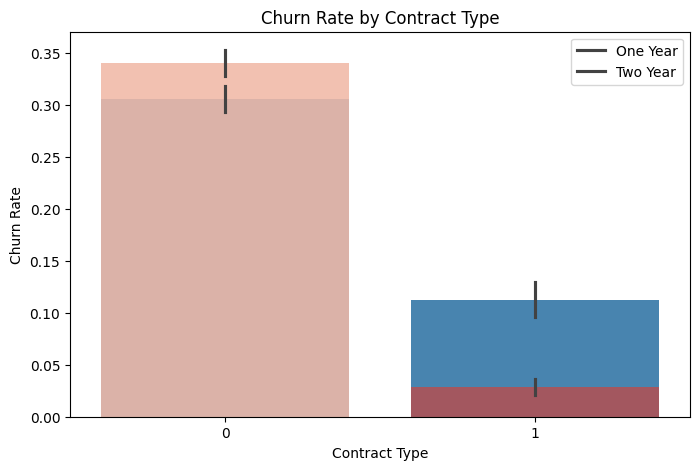

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x="Contract_One year", y="Churn", data=df, palette="Blues")
sns.barplot(x="Contract_Two year", y="Churn", data=df, palette="Reds", alpha=0.7)
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.legend(["One Year", "Two Year"])
plt.show()

### Payment Method Vs Churn

<ipython-input-19-e6d45c5dd872>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_churn.index, y=payment_churn.values, palette="coolwarm")


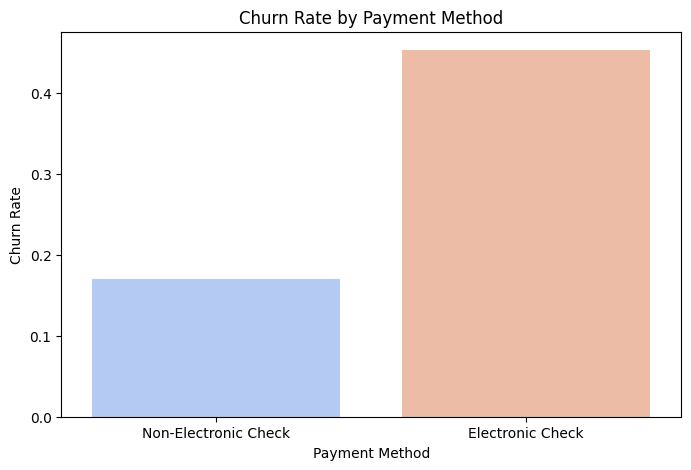

In [19]:
plt.figure(figsize=(8,5))

# Calculate churn rate per payment method
payment_churn = df.groupby("PaymentMethod_Electronic check")["Churn"].mean()

# Plot
sns.barplot(x=payment_churn.index, y=payment_churn.values, palette="coolwarm")

plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Churn Rate")
plt.xticks(ticks=[0,1], labels=["Non-Electronic Check", "Electronic Check"])
plt.show()

### Senior Citizen vs Churn

<ipython-input-20-a5323d0a583c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="SeniorCitizen", y="Churn", data=df, palette="muted")


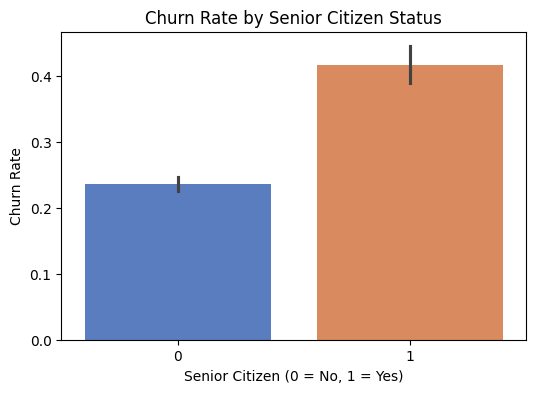

In [20]:
plt.figure(figsize=(6,4))
sns.barplot(x="SeniorCitizen", y="Churn", data=df, palette="muted")
plt.title("Churn Rate by Senior Citizen Status")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Churn Rate")
plt.show()


### Tenure Vs Churn

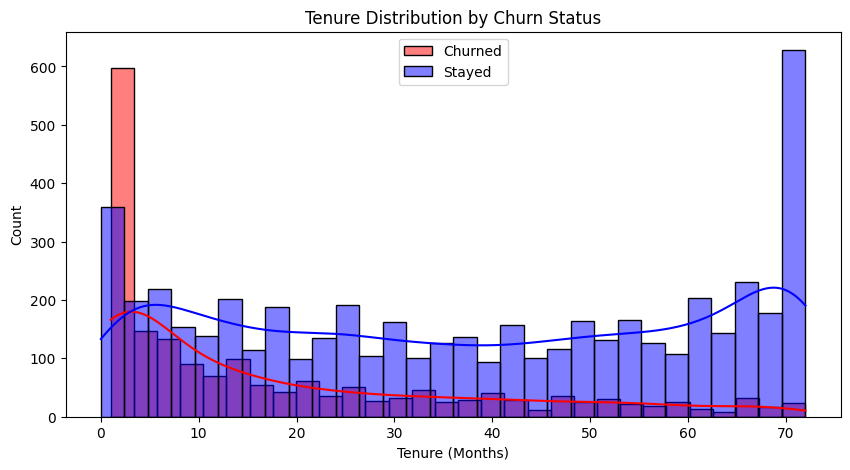

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(df[df["Churn"] == 1]["tenure"], bins=30, kde=True, color="red", label="Churned")
sns.histplot(df[df["Churn"] == 0]["tenure"], bins=30, kde=True, color="blue", label="Stayed")
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.legend()
plt.show()


### Monthly Charges vs Churn

<ipython-input-22-5f675d96e74c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm")


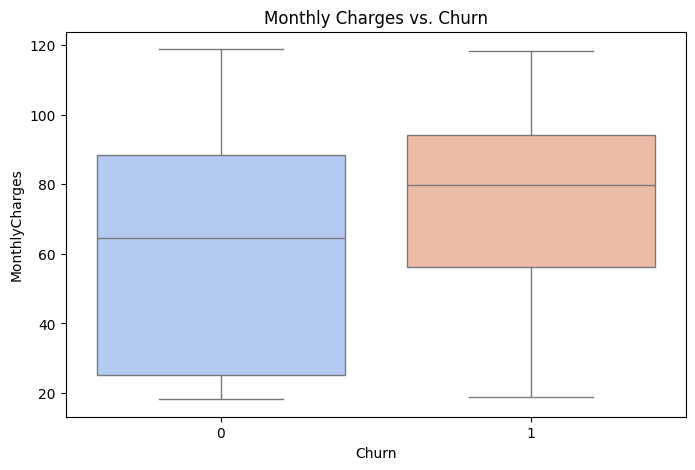

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm")
plt.title("Monthly Charges vs. Churn")
plt.show()


## Feature Selection

- SelectKBest (Statistical Test - Chi-Square/F-Score for importance ranking)

- Recursive Feature Elimination (RFE - Removes least important features iteratively)

Selecting Features Using SelectKBest

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define X (features) and y (target)
X = df.drop(columns=["customerID", "Churn"])  # Drop ID & target variable
y = df["Churn"]

# Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SelectKBest (Select top 10 best features)
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['tenure', 'InternetService_Fiber optic',
       'OnlineSecurity_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [34] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [25]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Use a basic model for RFE (Random Forest)
model = RandomForestClassifier(n_estimators=50, random_state=42)

# RFE to select top 10 features
rfe = RFE(estimator=model, n_features_to_select=10)
X_rfe_selected = rfe.fit_transform(X_scaled, y)

# Get selected feature names
selected_rfe_features = X.columns[rfe.get_support()]
print("Selected RFE Features:", selected_rfe_features)

Selected RFE Features: Index(['gender', 'Partner', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'InternetService_Fiber optic', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check'],
      dtype='object')


## Model Training

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_rfe_selected, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "SVM": SVC(kernel="rbf")
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.61      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:14:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.61      0.53      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


SVM Performance:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



## Feature Engineering

### Handling TotalCharges (Convert & Fix Missing Values)

The TotalCharges column was loaded as an object instead of a numeric type. Let’s fix it:

In [27]:
# Convert 'TotalCharges' to numeric, replacing empty strings with NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing TotalCharges with MonthlyCharges * tenure (logical estimation)
df["TotalCharges"].fillna(df["MonthlyCharges"] * df["tenure"], inplace=True)

# Confirm conversion
print(df["TotalCharges"].dtype)  # Should be float64

float64


<ipython-input-27-1c1728f2a8d5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["MonthlyCharges"] * df["tenure"], inplace=True)


### Creating New groups

In [28]:
# Define tenure groups
df["TenureGroup"] = pd.cut(df["tenure"], bins=[0, 12, 24, 48, 60, 72, float("inf")],
                           labels=["0-12", "12-24", "24-48", "48-60", "60-72", "72+"])


In [30]:
print(df.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'TenureGroup_12-24', 'TenureGroup_24-48', 'TenureGroup_48-60',
       'TenureGroup_60-72', 'TenureGroup_72+', 'TenureGroup', 'Recency'],
     